In [93]:
# Initialize

import csv
from collections import Counter
import requests
import pandas as pd
from matplotlib_venn import venn3

In [ ]:
gene_counter = Counter()
print(gene_counter)

In [ ]:
gene_counter = Counter()

# Read through each row of the csv, index out only the list of overlapping genes, split by semicolon space and 
# add to a counter of genes. 
with open('gene_pathway_gene_symbols.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader) # SKIP THAT HEADER!!!!!!!!
    for row in reader:
        items = row[0].split()
        gene_counter.update(items)

print("YESSSSSSSSSSSSSSSSSS")

In [ ]:
sorted_gene_counter = Counter(dict(gene_counter.most_common()))

In [ ]:
# Save genes to a txt file.

with open('Gene_Counts.txt', 'w') as file:
    for gene, count in sorted_gene_counter.items():
        file.write(f"{gene}: {count}\n")

In [ ]:
# read in dataframe of gene pathways and gene symbols
gene_df = pd.read_csv('gene_pathway_gene_symbols.csv')
gene_df.head()

In [ ]:
# make a dataframe of all rows that contain one of the top three 
top3_df = gene_df[gene_df['GENE_ID'].isin(top_three)]
top3_df.head()

### 5. Retrieve a set of the pathways the top 3 genes appear on.

In [113]:
# create list of all pathways that the top 3 genes appear on 
set(top3_df['PATHWAY_NAME'].unique().tolist())

{'AGE-RAGE signaling pathway in diabetic complications - Homo sapiens (human)',
 'AMPK signaling pathway - Homo sapiens (human)',
 'Acute myeloid leukemia - Homo sapiens (human)',
 'Adherens junction - Homo sapiens (human)',
 'Adrenergic signaling in cardiomyocytes - Homo sapiens (human)',
 'Alcoholism - Homo sapiens (human)',
 'Aldosterone-regulated sodium reabsorption - Homo sapiens (human)',
 'Alzheimer disease - Homo sapiens (human)',
 'Amoebiasis - Homo sapiens (human)',
 'Apelin signaling pathway - Homo sapiens (human)',
 'Apoptosis - Homo sapiens (human)',
 'Autophagy - animal - Homo sapiens (human)',
 'Axon guidance - Homo sapiens (human)',
 'B cell receptor signaling pathway - Homo sapiens (human)',
 'Bacterial invasion of epithelial cells - Homo sapiens (human)',
 'Bladder cancer - Homo sapiens (human)',
 'Breast cancer - Homo sapiens (human)',
 'C-type lectin receptor signaling pathway - Homo sapiens (human)',
 'Carbohydrate digestion and absorption - Homo sapiens (human)',


### 6. Compute and display a Venn diagram for number of overlapping pathways for the top 3 genes.

In [ ]:
# get top three genes from the list

sorted_gene_counter2 = dict(gene_counter.most_common())
top_three = list(sorted_gene_counter2.keys())[:3]
top_three

In [95]:
# function that returns a set of pathways associated with a particular gene_id
def pathway_setter(df, id):
    paths = set(df.loc[df['GENE_ID'] == id, 'PATHWAY_NAME'])
    return paths

In [97]:
# get the sets 
hsa_5595 = pathway_setter(gene_df, 'hsa:5595')

In [99]:
hsa_5594 = pathway_setter(gene_df, 'hsa:5594')

In [101]:
hsa_5290 = pathway_setter(gene_df, 'hsa:5290')

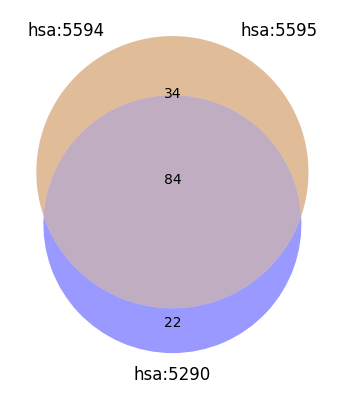

In [103]:
venn3([hsa_5595, hsa_5594, hsa_5290], set_labels = top_three)